## 11.1 Hierarchical and grouped time series
### Hierarchical time series
<img src="../figures/hierarchical.png" alt="hierarchical" width="200"/>

In this example, the total number of series in the hierarchy is $n=1+2+5=8$, while the number of series at the bottom level is $m=5$. Note that $n>m$ is all hierarchies.

For any time $t$, the observations at the bottom level of the hierarchy will sum to the observations of the series above. For example:

$$
y_t = y_{AA,t} + y_{AB,t} + y_{AC,t} + y_{BA, t} + y_{BB, t},
$$
$$
y_{A, t} = y_{AA, t} + y_{AC,t}\quad\quad\text{and}\quad\quad y_{B,t} = y_{BA,t} + y_{BB,t}.
$$
Substituting we also get $y_t = y_{A,t} + y_{B, t}$.

### Example: Australian tourism hierarchy

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
from utils import *

In [3]:
df = pd.read_csv('../data/tsibble/tourism.csv')

In [16]:
df_agg_regions = (
    df.assign(date=lambda df: pd.to_datetime(df.Quarter.str.replace(" ", "")))
    .groupby(["State", "Region", "date"])
    .agg({"Trips": "sum"})
    .reset_index()
    .replace(
        {
            "New South Wales": "NSW",
            "Northern Territory": "NT",
            "Queensland": "QLD",
            "South Australia": "SA",
            "Tasmania": "TAS",
            "Victoria": "VIC",
            "Western Australia": "WA",
        }
    )
)


In [ ]:
df_states = df_agg_regions.groupby(['date', 'State']).agg({'Trips': 'sum'}).reset_index()
df_national = df_agg_regions.groupby('date').agg({'Trips': 'sum'}).reset_index()
df_national['State'] = 'National'
df_agg = pd.concat([df_states, df_national])

In [ ]:
from plotnine import facet_wrap

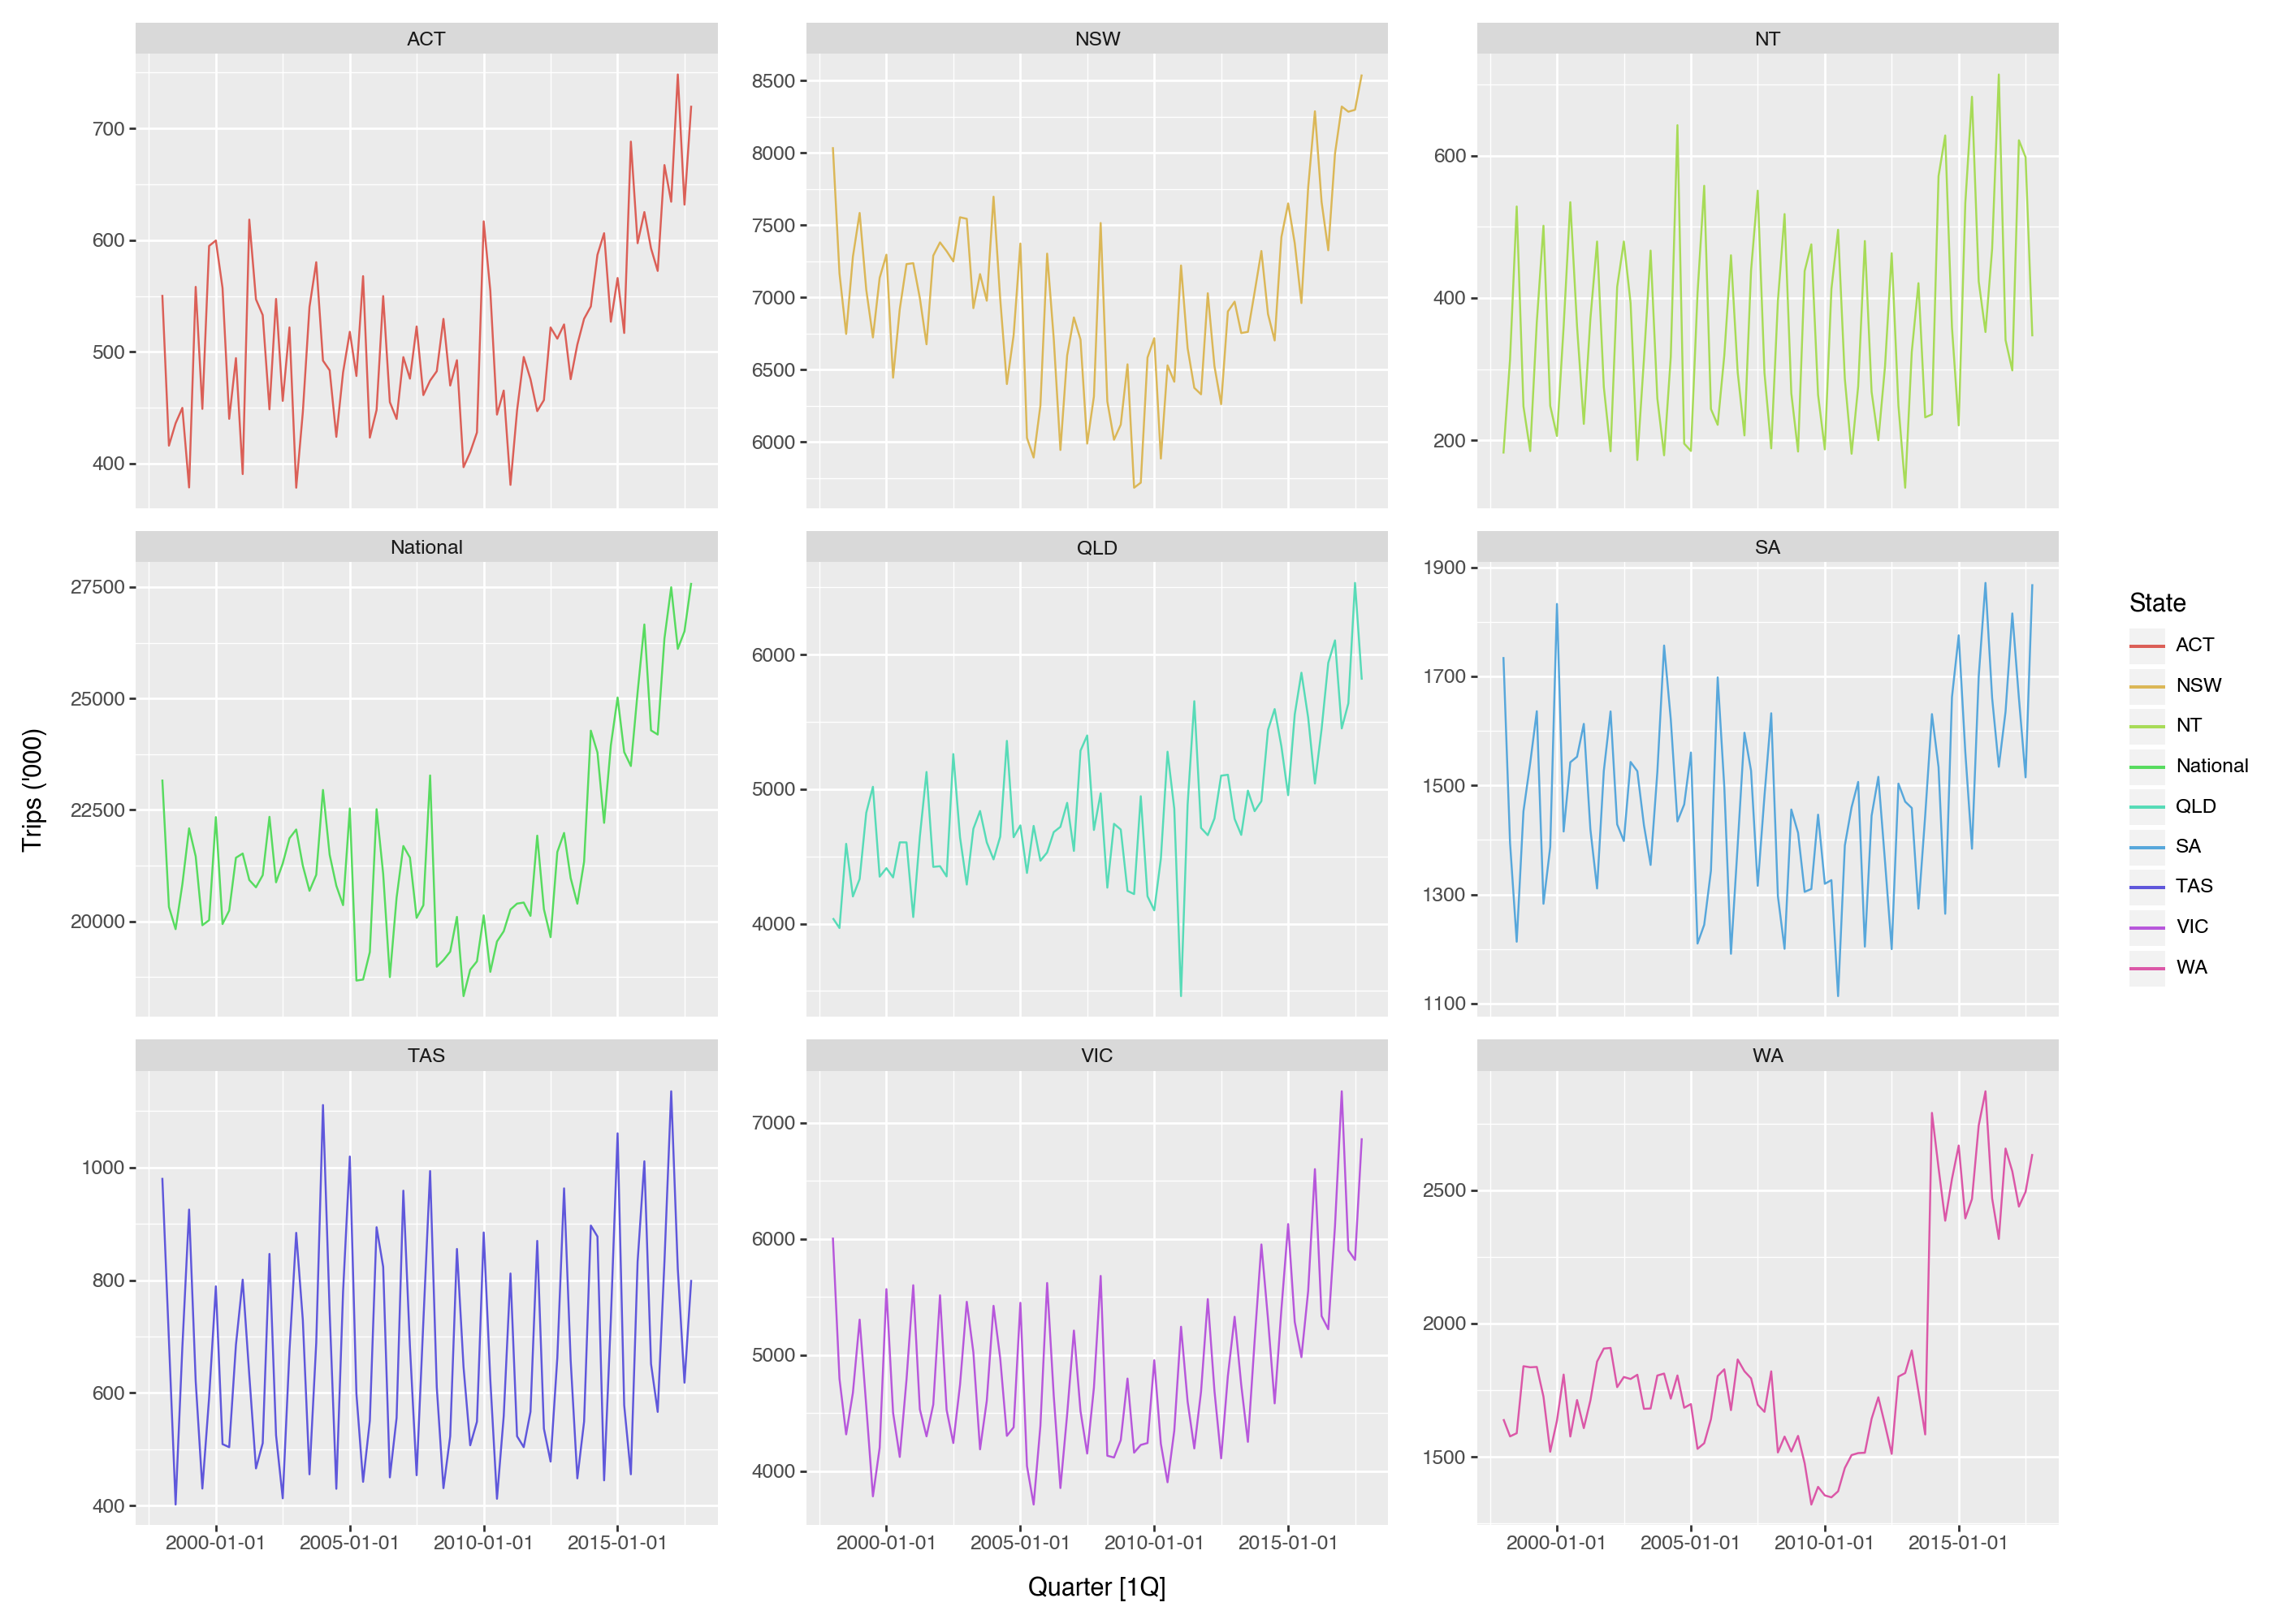

In [42]:
(
    ggplot(df_agg)
    + aes(x="date", y="Trips", color='State')
    + geom_line()
    + facet_wrap(facets="State", scales="free_y")
    + theme(figure_size=(14, 10))
    + labs(y="Trips ('000)", x='Quarter [1Q]')
)
